In [1]:
ls

 Volume in drive C is Windows-SSD
 Volume Serial Number is 1C53-892B

 Directory of C:\Users\Abhinav Bajaj\OneDrive\Mtech\project

11-03-2025  00:20    <DIR>          .
09-03-2025  11:55    <DIR>          ..
11-03-2025  00:20    <DIR>          .ipynb_checkpoints
11-03-2025  00:20           434,060 first_draft.ipynb
10-03-2025  21:33            26,487 Untitled1.ipynb
               2 File(s)        460,547 bytes
               3 Dir(s)  32,679,034,880 bytes free


In [2]:
cd D:\Mini Project\data\mimic_dset\re_512_3ch\Train

D:\Mini Project\data\mimic_dset\re_512_3ch\Train


In [3]:
import pandas as pd

In [4]:
cd ..

D:\Mini Project\data\mimic_dset\re_512_3ch


In [5]:
path = "D:/Mini Project/data/mimic_dset/re_512_3ch/Train/*.jpg"

In [6]:
import glob
import tensorflow as tf

image_paths = glob.glob(path)  # Adjust extension if needed

def load_image(image_path):
    img = tf.io.read_file(image_path)
    img = tf.image.decode_jpeg(img, channels=3)  # Convert to RGB
    img = tf.image.resize(img, (224, 224))  # Resize for CLIP
    img = img / 255.0  # Normalize
    return img, image_path

dataset = tf.data.Dataset.from_tensor_slices(image_paths)
dataset = dataset.map(load_image).batch(32)  # Process images in batches

In [20]:
batch = next(iter(dataset))  # Get the first batch
batch

(<tf.Tensor: shape=(32, 224, 224, 3), dtype=float32, numpy=
 array([[[[1.62064855e-03, 1.62064855e-03, 1.62064855e-03],
          [6.26250636e-03, 6.26250636e-03, 6.26250636e-03],
          [3.62144853e-03, 3.62144853e-03, 3.62144853e-03],
          ...,
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],
 
         [[1.14845950e-02, 1.14845950e-02, 1.14845950e-02],
          [1.54061634e-02, 1.54061634e-02, 1.54061634e-02],
          [1.45658273e-02, 1.45658273e-02, 1.45658273e-02],
          ...,
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00],
          [0.00000000e+00, 0.00000000e+00, 0.00000000e+00]],
 
         [[1.14645856e-02, 1.14645856e-02, 1.14645856e-02],
          [1.56262517e-02, 1.56262517e-02, 1.56262517e-02],
          [1.41856736e-02, 1.41856736e-02, 1.41856736e-02],
    

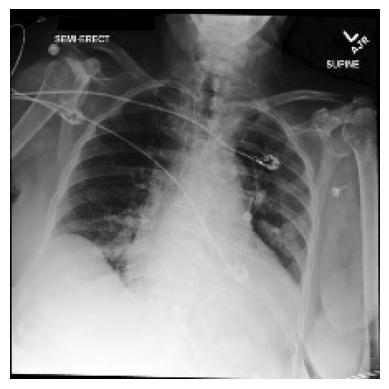

In [28]:
import matplotlib.pyplot as plt

batch = next(iter(dataset))  # Get first batch
image = batch[0][0].numpy()  # Convert tensor to NumPy array

plt.imshow(image)
plt.axis("off")
plt.show()

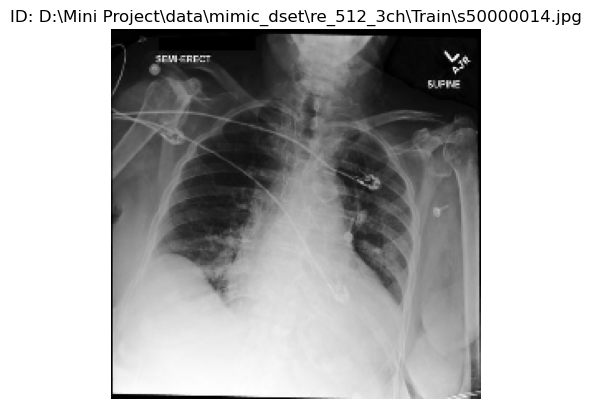

Image Path: D:\Mini Project\data\mimic_dset\re_512_3ch\Train\s50000014.jpg


In [30]:
import tensorflow as tf
import matplotlib.pyplot as plt

path = "D:/Mini Project/data/mimic_dset/re_512_3ch/Train/*.jpg"
image_paths = tf.data.Dataset.list_files(path, shuffle=False)  # Adjust extension if needed

# Function to load image and keep filename
def load_image_with_path(file_path):
    img = tf.io.read_file(file_path)
    img = tf.image.decode_jpeg(img, channels=3)  # Convert to RGB
    img = tf.image.resize(img, (224, 224)) / 255.0  # Normalize
    return img, file_path  # Return both image and path

# Create dataset with images and filenames
dataset = image_paths.map(load_image_with_path).batch(32)  # Batch processing

# Get a batch of images with paths
for batch_images, batch_paths in dataset.take(1):  
    image = batch_images[0].numpy()  # Get first image
    image_path = batch_paths[0].numpy().decode("utf-8")  # Get file path as string

    # Display the image
    plt.imshow(image)
    plt.axis("off")
    plt.title(f"ID: {image_path.split('/')[-1]}")  # Show filename as ID
    plt.show()

    print(f"Image Path: {image_path}")  # Print full image path


In [32]:
import pandas as pd
import os

# Define paths
dataset_path = "D:/Mini Project/data/NLP_aug_datasets/df_train_aug.csv"  # Update with your actual path

# Read CSV
df = pd.read_csv(dataset_path)
df.head()

,id,text,path,aug_text
0,s53865364,"In comparison with the study of ___, there is ...",../input/curated-cxr-report-generation-dataset...,['there is no evidence of pneumothorax with th...
1,s56124320,AP chest compared to ___: PICC line ends in th...,../input/curated-cxr-report-generation-dataset...,['AP chest compared to ___: PICC line ends in ...
2,s50991033,The endotracheal tube tip now lies approximate...,../input/curated-cxr-report-generation-dataset...,['endotracheal tube tip now lies approximately...
3,s50337281,"The cardiac, mediastinal and hilar contours ar...",../input/curated-cxr-report-generation-dataset...,"['cardiac, mediastinal and hilar contours are ..."
4,s51904641,Comparison to ___. No relevant change. Low lun...,../input/curated-cxr-report-generation-dataset...,['no relevant change. Low lung volumes. Modera...


In [34]:
df['text'].iloc[0]

'In comparison with the study of ___, there is little overall change. With the chest tube on waterseal, there is no evidence of pneumothorax. Bilateral pulmonary opacifications persist.'

In [36]:
df['aug_text'].iloc[0]

"['there is no evidence of pneumothorax with the chest tube on waterseal. bilateral pulmonary opacifications persist. there is little overall change in the pulmonary system compared with the study of ___.']"

In [38]:
df[df['id'] == "s50000014"]

,id,text,path,aug_text


In [40]:
df

,id,text,path,aug_text
0,s53865364,"In comparison with the study of ___, there is ...",../input/curated-cxr-report-generation-dataset...,['there is no evidence of pneumothorax with th...
1,s56124320,AP chest compared to ___: PICC line ends in th...,../input/curated-cxr-report-generation-dataset...,['AP chest compared to ___: PICC line ends in ...
2,s50991033,The endotracheal tube tip now lies approximate...,../input/curated-cxr-report-generation-dataset...,['endotracheal tube tip now lies approximately...
3,s50337281,"The cardiac, mediastinal and hilar contours ar...",../input/curated-cxr-report-generation-dataset...,"['cardiac, mediastinal and hilar contours are ..."
4,s51904641,Comparison to ___. No relevant change. Low lun...,../input/curated-cxr-report-generation-dataset...,['no relevant change. Low lung volumes. Modera...
...,...,...,...,...
49995,s50858163,1. Interval extubation and removal of the naso...,../input/curated-cxr-report-generation-dataset...,['internal extubation and removal of the nasog...
49996,s52131300,The Swan-Ganz has been removed. Pacemaker defi...,../input/curated-cxr-report-generation-dataset...,['the Swan-Ganz has been removed. the defibril...
49997,s53747282,The Swan-Ganz catheter is been removed. The ri...,../input/curated-cxr-report-generation-dataset...,['the right IJ cordis is in place and the hear...
49998,314,Low lung volumes. Normal heart size. The trach...,../input/curated-cxr-report-generation-dataset...,['the trachea is midline. Lungs are clear. No ...


In [42]:
path 

'D:/Mini Project/data/mimic_dset/re_512_3ch/Train/*.jpg'

In [45]:
path = "D:/Mini Project/data/mimic_dset/re_512_3ch/Train/"
df["image_name"] = df["id"].astype(str) + ".jpg"  # Ensure 'id' is a string and add ".jpg"
df["image_path"] = df["image_name"].apply(lambda x: os.path.join(path, x))  

In [47]:
df['image_path'].iloc[0]

'D:/Mini Project/data/mimic_dset/re_512_3ch/Train/s53865364.jpg'

In [49]:
df1 = df[['id','text','image_path']]
df1

,id,text,image_path
0,s53865364,"In comparison with the study of ___, there is ...",D:/Mini Project/data/mimic_dset/re_512_3ch/Tra...
1,s56124320,AP chest compared to ___: PICC line ends in th...,D:/Mini Project/data/mimic_dset/re_512_3ch/Tra...
2,s50991033,The endotracheal tube tip now lies approximate...,D:/Mini Project/data/mimic_dset/re_512_3ch/Tra...
3,s50337281,"The cardiac, mediastinal and hilar contours ar...",D:/Mini Project/data/mimic_dset/re_512_3ch/Tra...
4,s51904641,Comparison to ___. No relevant change. Low lun...,D:/Mini Project/data/mimic_dset/re_512_3ch/Tra...
...,...,...,...
49995,s50858163,1. Interval extubation and removal of the naso...,D:/Mini Project/data/mimic_dset/re_512_3ch/Tra...
49996,s52131300,The Swan-Ganz has been removed. Pacemaker defi...,D:/Mini Project/data/mimic_dset/re_512_3ch/Tra...
49997,s53747282,The Swan-Ganz catheter is been removed. The ri...,D:/Mini Project/data/mimic_dset/re_512_3ch/Tra...
49998,314,Low lung volumes. Normal heart size. The trach...,D:/Mini Project/data/mimic_dset/re_512_3ch/Tra...


In [51]:
pd = df1[df1['id'] == 's52131300']['image_path'].values[0]
pd

'D:/Mini Project/data/mimic_dset/re_512_3ch/Train/s52131300.jpg'

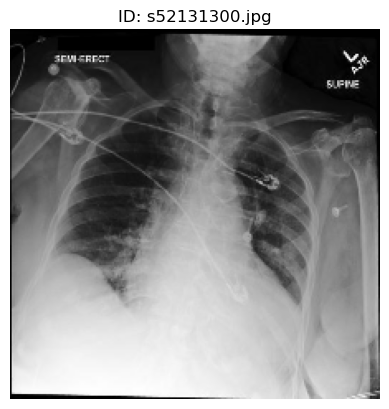

Image Path: D:/Mini Project/data/mimic_dset/re_512_3ch/Train/s52131300.jpg


In [53]:
image = batch_images[0].numpy()  # Get first image
image_path = df1[df1['id'] == 's52131300']['image_path'].values[0]

# Display the image
plt.imshow(image)
plt.axis("off")
plt.title(f"ID: {image_path.split('/')[-1]}")  # Show filename as ID
plt.show()

print(f"Image Path: {image_path}")

In [55]:
import os

# Function to check if the image exists
def file_exists(image_path):
    return os.path.exists(image_path)

# Filter the dataset by keeping only rows where the image exists
df1 = df[['id', 'text', 'image_path']].copy()  # Ensure correct dataframe selection
df1 = df1[df1["image_path"].apply(file_exists)].reset_index(drop=True)  # Keep only valid rows
df1

,id,text,image_path
0,s53865364,"In comparison with the study of ___, there is ...",D:/Mini Project/data/mimic_dset/re_512_3ch/Tra...
1,s56124320,AP chest compared to ___: PICC line ends in th...,D:/Mini Project/data/mimic_dset/re_512_3ch/Tra...
2,s50991033,The endotracheal tube tip now lies approximate...,D:/Mini Project/data/mimic_dset/re_512_3ch/Tra...
3,s50337281,"The cardiac, mediastinal and hilar contours ar...",D:/Mini Project/data/mimic_dset/re_512_3ch/Tra...
4,s51904641,Comparison to ___. No relevant change. Low lun...,D:/Mini Project/data/mimic_dset/re_512_3ch/Tra...
...,...,...,...
35728,s56053139,Portable upright chest radiograph was obtained...,D:/Mini Project/data/mimic_dset/re_512_3ch/Tra...
35729,s50858163,1. Interval extubation and removal of the naso...,D:/Mini Project/data/mimic_dset/re_512_3ch/Tra...
35730,s52131300,The Swan-Ganz has been removed. Pacemaker defi...,D:/Mini Project/data/mimic_dset/re_512_3ch/Tra...
35731,s53747282,The Swan-Ganz catheter is been removed. The ri...,D:/Mini Project/data/mimic_dset/re_512_3ch/Tra...


In [56]:
#pip install torch torchvision transformers open_clip_torch

In [61]:
#a,b,c = open_clip.create_model_and_transforms("ViT-B/32", pretrained="openai")

In [59]:
import torch
import open_clip  # CLIP from OpenAI
from torchvision import transforms
from PIL import Image
import pandas as pd

# Load CLIP model (ViT-B/32)
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess, transform1 = open_clip.create_model_and_transforms("ViT-B/32", pretrained="openai")

C:\Users\Abhinav Bajaj\AppData\Roaming\Python\Python312\site-packages\open_clip\factory.py:388: UserWarning: These pretrained weights were trained with QuickGELU activation but the model config does not have that enabled. Consider using a model config with a "-quickgelu" suffix or enable with a flag.
  warnings.warn(


In [63]:
tokenizer = open_clip.get_tokenizer("ViT-B-32")

In [65]:
# CLIP image preprocessing (from OpenAI's recommended transforms)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to match CLIP's input size
    transforms.ToTensor(),           # Convert to tensor
    transforms.Normalize((0.481, 0.457, 0.408), (0.268, 0.261, 0.275))  # Normalize per CLIP
])

In [68]:
# Function to load image & preprocess
def load_image(image_path):
    image = Image.open(image_path).convert("RGB")  # Ensure RGB format
    return transform(image)

# Function to get CLIP embeddings
def get_clip_embeddings(image_paths, texts):
    # Process images
    images = torch.stack([load_image(img) for img in image_paths]).to(device)

    # Process text
    tokenized_texts = tokenizer(texts).to(device)

    # Forward pass through CLIP model
    with torch.no_grad():
        image_features = model.encode_image(images)
        text_features = model.encode_text(tokenized_texts)

    # Normalize embeddings
    image_features /= image_features.norm(dim=-1, keepdim=True)
    text_features /= text_features.norm(dim=-1, keepdim=True)

    return image_features, text_features

# Example: Process the first 8 images & texts
batch_size = 8
sample_images = df1["image_path"][:batch_size].tolist()
sample_texts = df1["text"][:batch_size].tolist()

image_embeds, text_embeds = get_clip_embeddings(sample_images, sample_texts)

# Print shape of embeddings
print(f"Image Embeddings Shape: {image_embeds.shape}")  # (batch_size, 512)
print(f"Text Embeddings Shape: {text_embeds.shape}")    # (batch_size, 512)

Image Embeddings Shape: torch.Size([8, 512])
Text Embeddings Shape: torch.Size([8, 512])


In [70]:
import numpy as np
cosine_sim = (image_embeds @ text_embeds.T).cpu().numpy()  # (10, 10) similarity matrix

best_matches = np.argmax(cosine_sim, axis=1)  # Index of the most similar text for each image

for i, img_path in enumerate(sample_images):
    best_text_idx = best_matches[i]
    best_text = sample_texts[best_text_idx]
    similarity_score = cosine_sim[i][best_text_idx]

    print(f"🖼️ Image: {os.path.basename(img_path)}")
    print(f"📜 Best Matching Text: {best_text}")
    print(f"🔢 Similarity Score: {similarity_score:.4f}\n")

🖼️ Image: s53865364.jpg
📜 Best Matching Text: Portable AP radiograph of the chest was reviewed in comparison to ___. Tubes and lines are in unchanged position. Heart size and mediastinum are unchanged. The patient continues to be in interstitial pulmonary edema with no substantial change since the prior study, associated with bilateral pleural effusions. No appreciable pneumothorax or pneumomediastinum is demonstrated within the limitations of this study technique. Besides the right lower paracardiac area, the lucency is seen that potentially might reflect loculation of air. If clinically warranted, correlation with chest CT dedicated to this area might be considered. This appearance is more prominent than back on ___ and ___ radiographs, although potentially might reflect sparing of the lung parenchyma as well.
🔢 Similarity Score: 0.3455

🖼️ Image: s56124320.jpg
📜 Best Matching Text: Portable AP radiograph of the chest was reviewed in comparison to ___. Tubes and lines are in unchange

In [72]:
#pip install faiss-cpu

In [74]:
import faiss
import numpy as np

image_vectors = image_embeds.cpu().numpy()  # Shape: (num_images, 512)

index = faiss.IndexFlatL2(image_vectors.shape[1])  # L2 Distance for similarity search
index.add(image_vectors)  # Add embeddings to FAISS
image_id_to_text = {i: text for i, text in enumerate(sample_texts)}

print("FAISS Index Built!")

FAISS Index Built!


In [77]:
text_embeds

tensor([[-0.0127,  0.0123, -0.0309,  ..., -0.0645,  0.0020,  0.0195],
        [ 0.0051,  0.0017, -0.0652,  ..., -0.0110,  0.0519, -0.0387],
        [-0.0129,  0.0038, -0.0256,  ..., -0.1177, -0.0122,  0.0238],
        ...,
        [-0.0021,  0.0161, -0.0146,  ..., -0.0028,  0.0258, -0.0132],
        [-0.0146,  0.0082, -0.0418,  ...,  0.0133,  0.0312, -0.0144],
        [ 0.0183,  0.0203, -0.0474,  ..., -0.1385,  0.0103,  0.0305]])

In [79]:
def search_faiss(query_vector, top_k=5):
    query_vector = query_vector.cpu().numpy().reshape(1, -1)  # Reshape for FAISS
    distances, indices = index.search(query_vector, top_k)  # Retrieve top-k matches
    
    results = []
    for i in range(top_k):
        img_id = indices[0][i]
        similarity_score = 1 - distances[0][i]  # Convert L2 to similarity score
        results.append((image_id_to_text[img_id], similarity_score))
    
    return results

top_matches = search_faiss(text_embeds[0])
for text, score in top_matches:
    print(f"📜 Retrieved Text: {text} (Score: {score:.4f})")

📜 Retrieved Text: AP chest compared to ___: PICC line ends in the left axilla, far from the left axillary or subclavian veins. The patient has had median sternotomy and AVR. Opacification of the base of the left lung could be pneumonia. Conventional radiography recommended if feasible. Right lung clear. Heart mildly enlarged. No pulmonary edema. Dr. ___ was paged at 9:30 a.m., since the findings were recognized. (Score: -0.3463)
📜 Retrieved Text: Comparison to ___. No relevant change. Low lung volumes. Moderate cardiomegaly. Small right pleural effusion with subsequent basilar atelectasis. No overt pulmonary edema. No pneumonia. (Score: -0.3484)
📜 Retrieved Text: In comparison with the study of ___, there is little overall change. With the chest tube on waterseal, there is no evidence of pneumothorax. Bilateral pulmonary opacifications persist. (Score: -0.3529)
📜 Retrieved Text: The endotracheal tube tip now lies approximately 4.2 cm above the carina. Right subclavian catheter tip is a